# META METHODS

### IMPORTS

In [26]:
import numpy as np    
import pandas 
import sklearn as sk  
import warnings
warnings.filterwarnings("ignore")

### CARGAR LOS DATOS

In [27]:
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


### VOTING SCHEME

In [28]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=5

clf1 = MultinomialNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 5, 'weights': 'distance'} Accuracy= 0.5795254237288135
Accuracy: 0.649 [Naive Bayes]
Accuracy: 0.580 [Knn (3)]
Accuracy: 0.620 [Dec. Tree]


### HARD

In [29]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.645 [Majority Voting]


### SOFT

In [30]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2.5,1.5,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.639 [Weighted Voting]


### BAGGING

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

lb = []
for nest in [1,2,5,10,20]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2 = []
print()
for nest in [1,2,5,10,20]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest, max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())


KeyboardInterrupt: 

### RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.606 [1]
Accuracy: 0.596 [2]


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.647 [20]


### BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.618 [20]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.641 [20]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.612 [20]


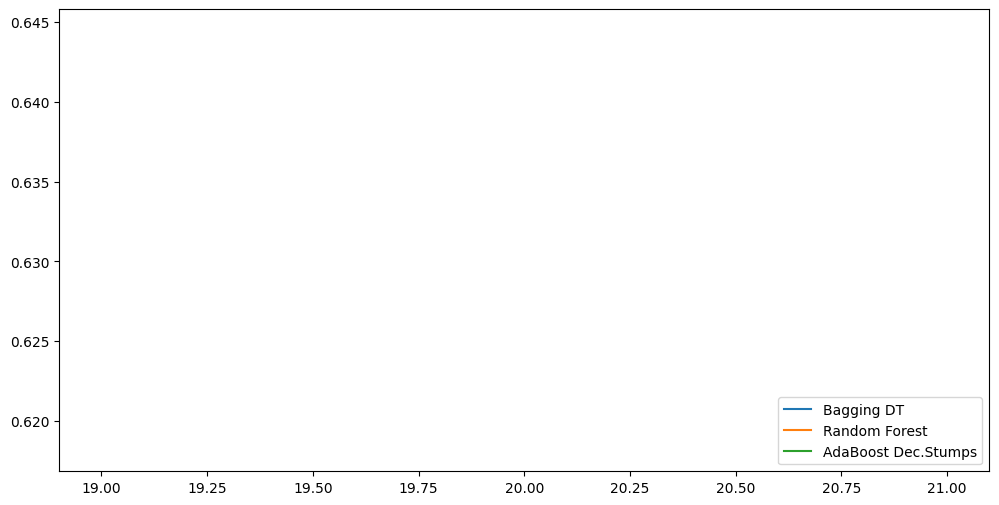

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20],lb,label="Bagging DT")
plt.plot([1,2,5,10,20],lrf,label="Random Forest")
plt.plot([1,2,5,10,20],lboo,label="AdaBoost Dec.Stumps")
plt.legend(loc='lower right')

plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20],lb,label="Bagging DT")
plt.plot([1,2,5,10,20],lrf,label="Random Forest")
plt.plot([1,2,5,10,20],lboo,label="AdaBoost Dec.Stumps")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.90,0.96)
plt.show()